# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv',index_col=None,encoding='latin-1')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1Â½-3',
 'ages_1Â½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birdsâ\x84¢',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comicsâ\x84¢ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONSâ\x84¢',
 'theme_name_DUPLOÂ®',
 'theme_name_Dilophosaurus Outpost Attack',

In [4]:
# Your code here - Manipulate column names
subs = [(' ','_'),('.',''),("'",""),('®',''),('Â',''),('â\x84¢',''),('+','plus'),('½','half'),('-','_')]

def transform_colname(df):
    df_clone = df.copy()
    cols_rename = []
    for col in df_clone.columns:
        for old, new in subs:
            col = col.replace(old,new)
        cols_rename.append(col)
    df_clone.columns = cols_rename
    return df_clone

In [5]:
df2 = transform_colname(df)
list(df2.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
# Your code here - Define the target and predictors
print(list(df2.columns))
df3 = df2.drop('list_price', axis=1)
print(list(df3.columns))
#X = list(df3.columns)
#y = df2['list_price']

['piece_count', 'list_price', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14', 'ages_10_16', 'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_1half_3', 'ages_1half_5', 'ages_2_5', 'ages_4plus', 'ages_4_7', 'ages_4_99', 'ages_5plus', 'ages_5_12', 'ages_5_8', 'ages_6plus', 'ages_6_12', 'ages_6_14', 'ages_7plus', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14', 'ages_9_16', 'theme_name_Angry_Birds', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_3_in_1', 'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes', 'theme_name_DC_Super_Hero_Girls', 'theme_name_DIMENSIONS', 'theme_name_DUPLO', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Elve

In [8]:
# Your code here - Split into train and test
# Split the data into training and test sets (assign 20% to test set)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train, test = train_test_split(df2, test_size=0.25, random_state=42)
print('train:',np.size(train))
print('test:',np.size(test))
print('ratio:',round(np.divide(np.size(test),np.size(train)),3))
print('-------------------------------------------------------')
print('train (check):',len(train),train.shape[0])
print('test (check):',len(test),test.shape[0])
print('ratio (check):',round(np.divide(len(test),len(train)),3))

train: 839656
test: 279954
ratio: 0.333
-------------------------------------------------------
train (check): 8152 8152
test (check): 2718 2718
ratio (check): 0.333


In [9]:
# Your code here - Split into train and test
# Split the data into training and test sets (assign 20% to test set)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train2, test2 = train_test_split(df2)
print('train:',np.size(train2))
print('test:',np.size(test2))
print('ratio:',round(np.divide(np.size(test2),np.size(train2)),3))

train: 839656
test: 279954
ratio: 0.333


In [10]:
# Your code here - Fit the actual model
outcome = 'list_price'
predictors = '+'.join(df3.columns)
print(predictors)

piece_count+num_reviews+play_star_rating+star_rating+val_star_rating+ages_10plus+ages_10_14+ages_10_16+ages_10_21+ages_11_16+ages_12plus+ages_12_16+ages_14plus+ages_16plus+ages_1half_3+ages_1half_5+ages_2_5+ages_4plus+ages_4_7+ages_4_99+ages_5plus+ages_5_12+ages_5_8+ages_6plus+ages_6_12+ages_6_14+ages_7plus+ages_7_12+ages_7_14+ages_8plus+ages_8_12+ages_8_14+ages_9plus+ages_9_12+ages_9_14+ages_9_16+theme_name_Angry_Birds+theme_name_Architecture+theme_name_BOOST+theme_name_Blues_Helicopter_Pursuit+theme_name_BrickHeadz+theme_name_Carnotaurus_Gyrosphere_Escape+theme_name_City+theme_name_Classic+theme_name_Creator_3_in_1+theme_name_Creator_Expert+theme_name_DC_Comics_Super_Heroes+theme_name_DC_Super_Hero_Girls+theme_name_DIMENSIONS+theme_name_DUPLO+theme_name_Dilophosaurus_Outpost_Attack+theme_name_Disney+theme_name_Elves+theme_name_Friends+theme_name_Ghostbusters+theme_name_Ideas+theme_name_Indoraptor_Rampage_at_Lockwood_Estate+theme_name_Juniors+theme_name_Jurassic_Park_Velociraptor_Chas

In [11]:
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     531.8
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:23:07   Log-Likelihood:                -40683.
No. Observations:                8152   AIC:                         8.156e+04
Df Residuals:                    8057   BIC:                         8.222e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.9906      1.837     35.388      0.000      61.391      68.591
piece_count                                         75.3039      0.918     82.073      0.000      73.505      77.102
num_reviews                                          6.8871      0.705      9.770      0.000       5.505       8.269
play_star_rating                                     4.9973      0.638      7.830      0.000       3.746       6.248
star_rating                                         -0.5237      0.721     -0.727      0.467      -1.936       0.889
val_star_rating                                     -9.1327      0.651    -14.036      0.000     -10.408      -7.857
ages_10plus                                        124.4711      6.968     17.863      0.000     110.812     138.131
ages_10_14                                         -23.3215      9.360     -2.492      0.013     -41.670      -4.973
ages_10_16                                         -11.7835      4.103     -2.872      0.004     -19.825      -3.742
ages_10_21                                          54.4662      7.766      7.013      0.000      39.242      69.691
ages_11_16                                         -14.3253      6.009     -2.384      0.017     -26.104      -2.546
ages_12plus                                         71.6838      5.968     12.012      0.000      59.985      83.382
ages_12_16                                         -47.5989      6.902     -6.897      0.000     -61.128     -34.070
ages_14plus                                         20.6740      4.151      4.980      0.000      12.537      28.811
ages_16plus                                         30.7075      6.345      4.839      0.000      18.269      43.146
ages_1half_3                                        -9.1521      2.451     -3.734      0.000     -13.957      -4.347
ages_1half_5                                        -4.8670      3.216     -1.514      0.130     -11.171       1.437
ages_2_5                                            15.0620      1.743      8.641      0.000      11.645      18.479
ages_4plus                                         -20.4673      6.282     -3.258      0.001     -32.782      -8.153
ages_4_7                                            -6.3293      3.182     -1.989      0.047     -12.566      -0.093
ages_4_99                                           -2.0819      3.586     -0.581      0.562      -9.111       4.947
ages_5plus                                          -9.8430      3.048     -3.229      0.001     -15.818      -3.868
ages_5_12                                          -35.9125      3.206    -11.202      0.000     -42.197     -29.628
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [12]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head(20)

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14', 'ages_10_16', 'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_1half_3', 'ages_2_5', 'ages_4plus', 'ages_4_7', 'ages_5plus', 'ages_5_12', 'ages_6plus', 'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes', 'theme_name_DIMENSIONS', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate', 'theme_name_Marvel_Super_Heroes', 'theme_name_Minecraft', 'theme_name_Minifigures', 'theme_name_NINJAGO', 'theme_name_SERIOUS_PLA

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.9906,1.837,35.388,0.000,61.391,68.591
piece_count,75.3039,0.918,82.073,0.000,73.505,77.102
num_reviews,6.8871,0.705,9.770,0.000,5.505,8.269
play_star_rating,4.9973,0.638,7.830,0.000,3.746,6.248
star_rating,-0.5237,0.721,-0.727,0.467,-1.936,0.889
val_star_rating,-9.1327,0.651,-14.036,0.000,-10.408,-7.857
ages_10plus,124.4711,6.968,17.863,0.000,110.812,138.131
ages_10_14,-23.3215,9.360,-2.492,0.013,-41.670,-4.973
ages_10_16,-11.7835,4.103,-2.872,0.004,-19.825,-3.742


In [13]:
# Your code here - Refit the model
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     713.7
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:23:16   Log-Likelihood:                -40696.
No. Observations:                8152   AIC:                         8.153e+04
Df Residuals:                    8081   BIC:                         8.203e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.0193      2.386     27.246      0.000      60.341      69.697
piece_count                                         75.6544      0.895     84.487      0.000      73.899      77.410
num_reviews                                          6.7649      0.690      9.807      0.000       5.413       8.117
play_star_rating                                     4.7652      0.535      8.899      0.000       3.716       5.815
val_star_rating                                     -9.2197      0.510    -18.069      0.000     -10.220      -8.219
ages_10plus                                        118.5652      5.301     22.365      0.000     108.173     128.957
ages_10_14                                         -17.6164      9.857     -1.787      0.074     -36.939       1.706
ages_10_16                                          -7.1092      4.303     -1.652      0.099     -15.545       1.326
ages_10_21                                          44.7782      3.825     11.707      0.000      37.280      52.276
ages_11_16                                         -10.5977      6.096     -1.738      0.082     -22.548       1.353
ages_12plus                                         72.0199      6.617     10.884      0.000      59.049      84.991
ages_12_16                                         -41.2783      7.386     -5.588      0.000     -55.758     -26.799
ages_14plus                                         25.6741      5.006      5.129      0.000      15.861      35.487
ages_16plus                                         34.1094      7.190      4.744      0.000      20.015      48.204
ages_1half_3                                        -3.3589      3.599     -0.933      0.351     -10.413       3.695
ages_2_5                                            20.4106      2.707      7.539      0.000      15.104      25.717
ages_4plus                                         -19.2940      9.574     -2.015      0.044     -38.062      -0.526
ages_4_7                                            -2.0253      2.839     -0.713      0.476      -7.591       3.540
ages_5plus                                          -8.4455      3.113     -2.713      0.007     -14.549      -2.342
ages_5_12                                          -29.7754      3.253     -9.154      0.000     -36.152     -23.399
ages_6plus                                         -22.6726      5.775     -3.926      0.000     -33.993     -11.352
ages_6_12                                          -16.3522      2.578     -6.344      0.000     -21.405     -11.299
ages_7_12                                          -14.9827      2.846     -5.264      0.000     -20.562      -9.404
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [14]:
# Your code here - Continue to refine the model
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head(20)

72 59
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_21', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_2_5', 'ages_4plus', 'ages_5plus', 'ages_5_12', 'ages_6plus', 'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_Expert', 'theme_name_DIMENSIONS', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate', 'theme_name_Marvel_Super_Heroes', 'theme_name_Minecraft', 'theme_name_Minifigures', 'theme_name_NINJAGO', 'theme_name_SERIOUS_PLAY', 'theme_name_Star_Wars', 'theme_name_T_rex_Transport', 'theme_name_THE_LEGO_NINJAGO_MOVIE', 'country_CA', 'country_CZ'

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.0193,2.386,27.246,0.000,60.341,69.697
piece_count,75.6544,0.895,84.487,0.000,73.899,77.410
num_reviews,6.7649,0.690,9.807,0.000,5.413,8.117
play_star_rating,4.7652,0.535,8.899,0.000,3.716,5.815
val_star_rating,-9.2197,0.510,-18.069,0.000,-10.220,-8.219
ages_10plus,118.5652,5.301,22.365,0.000,108.173,128.957
ages_10_14,-17.6164,9.857,-1.787,0.074,-36.939,1.706
ages_10_16,-7.1092,4.303,-1.652,0.099,-15.545,1.326
ages_10_21,44.7782,3.825,11.707,0.000,37.280,52.276


In [15]:
# Your code here - Refit the model
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     860.2
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:23:23   Log-Likelihood:                -40705.
No. Observations:                8152   AIC:                         8.153e+04
Df Residuals:                    8093   BIC:                         8.194e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.1875      1.221     51.738      0.000      60.793      65.582
piece_count                                         75.0700      0.812     92.495      0.000      73.479      76.661
num_reviews                                          6.7314      0.685      9.823      0.000       5.388       8.075
play_star_rating                                     4.9513      0.528      9.369      0.000       3.915       5.987
val_star_rating                                     -9.3082      0.503    -18.493      0.000     -10.295      -8.322
ages_10plus                                        122.2433      4.889     25.002      0.000     112.659     131.828
ages_10_21                                          47.2760      3.299     14.331      0.000      40.809      53.743
ages_12plus                                         77.1138      6.137     12.565      0.000      65.084      89.144
ages_12_16                                         -35.8391      6.856     -5.228      0.000     -49.278     -22.400
ages_14plus                                         31.8061      4.192      7.588      0.000      23.589      40.023
ages_16plus                                         41.8522      6.223      6.725      0.000      29.654      54.051
ages_2_5                                            22.9946      1.849     12.437      0.000      19.370      26.619
ages_4plus                                         -19.0485      9.572     -1.990      0.047     -37.813      -0.284
ages_5plus                                          -7.1491      2.960     -2.415      0.016     -12.952      -1.346
ages_5_12                                          -26.4804      2.616    -10.121      0.000     -31.609     -21.352
ages_6plus                                         -19.4728      5.429     -3.587      0.000     -30.114      -8.831
ages_6_12                                          -12.4971      1.577     -7.925      0.000     -15.588      -9.406
ages_7_12                                          -11.7321      1.974     -5.942      0.000     -15.602      -7.862
ages_7_14                                           -8.1948      1.682     -4.872      0.000     -11.492      -4.898
ages_8plus                                          15.5962      4.540      3.435      0.001       6.696      24.496
ages_8_12                                          -12.4308      2.519     -4.935      0.000     -17.368      -7.493
ages_8_14                                           -6.3026      1.661     -3.795      0.000      -9.558      -3.047
ages_9plus                                         108.0792     11.546      9.361      0.000      85.446     130.713
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [16]:
# Your code here - Code a way to identify multicollinearity
X = df2[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.0162706049797565),
 ('num_reviews', 2.861600498811469),
 ('play_star_rating', 1.770905332737811),
 ('val_star_rating', 1.5859619699265435),
 ('ages_10plus', 7.0429278987871085),
 ('ages_10_21', 1.0540954181096809),
 ('ages_12plus', 5.917931197805461),
 ('ages_12_16', 1.1259974694260217),
 ('ages_14plus', 1.9337383969441426),
 ('ages_16plus', 8.360546695802475),
 ('ages_2_5', 1.191481518932897),
 ('ages_4plus', 1.1962938771983946),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1093475098263146),
 ('ages_6plus', 2.6554790744116064),
 ('ages_6_12', 1.6597737379897697),
 ('ages_7_12', 1.3996217532021578),
 ('ages_7_14', 1.6373624814518892),
 ('ages_8plus', 2.5753042489882727),
 ('ages_8_12', 1.2141480933801052),
 ('ages_8_14', 1.500467042683782),
 ('ages_9plus', 1.4021495190352349),
 ('ages_9_12', 1.0164156603475758),
 ('theme_name_Architecture', 5.129326838224074),
 ('theme_name_BOOST', 1.0590124378502608),
 ('theme_name_Blues_Helicopter_Pursuit', 1.0391361392521368),
 ('theme

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [17]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

59 52


In [18]:
# Your code here - Refit model with subset features
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     868.0
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:24:34   Log-Likelihood:                -41057.
No. Observations:                8152   AIC:                         8.222e+04
Df Residuals:                    8099   BIC:                         8.259e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.4937      1.108     58.199      0.000      62.321      66.666
piece_count                                         77.3511      0.678    114.052      0.000      76.022      78.681
num_reviews                                          5.4663      0.660      8.286      0.000       4.173       6.760
play_star_rating                                     5.7092      0.504     11.329      0.000       4.721       6.697
val_star_rating                                    -10.7333      0.503    -21.326      0.000     -11.720      -9.747
ages_10_21                                          46.3091      3.403     13.607      0.000      39.638      52.981
ages_12_16                                         -46.2323      6.945     -6.657      0.000     -59.846     -32.619
ages_14plus                                         11.6860      3.846      3.039      0.002       4.147      19.225
ages_2_5                                            22.6109      1.838     12.300      0.000      19.007      26.214
ages_4plus                                         -11.3528      9.914     -1.145      0.252     -30.786       8.081
ages_5_12                                          -27.6730      2.669    -10.369      0.000     -32.905     -22.441
ages_6plus                                         -21.7084      5.636     -3.851      0.000     -32.757     -10.660
ages_6_12                                          -14.8616      1.562     -9.513      0.000     -17.924     -11.799
ages_7_12                                          -13.1855      2.003     -6.584      0.000     -17.111      -9.260
ages_7_14                                           -9.8484      1.683     -5.852      0.000     -13.147      -6.550
ages_8plus                                           4.3540      4.634      0.940      0.347      -4.730      13.438
ages_8_12                                          -14.4966      2.558     -5.667      0.000     -19.511      -9.482
ages_8_14                                           -8.9043      1.683     -5.291      0.000     -12.203      -5.606
ages_9plus                                          22.8223     11.360      2.009      0.045       0.554      45.091
ages_9_12                                          -25.1644      6.425     -3.917      0.000     -37.759     -12.569
theme_name_BOOST                                    87.1122      9.922      8.780      0.000      67.663     106.562
theme_name_Blues_Helicopter_Pursuit                 21.4273      9.004      2.380      0.017       3.777      39.077
theme_name_Carnotaurus_Gyrosphere_Escape            45.4584     10.538      4.314      0.000      24.802      66.115
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

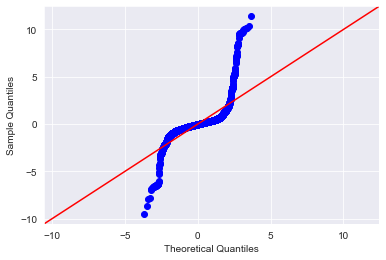

In [19]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

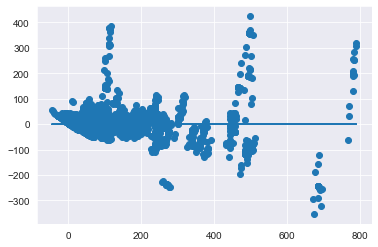

In [20]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

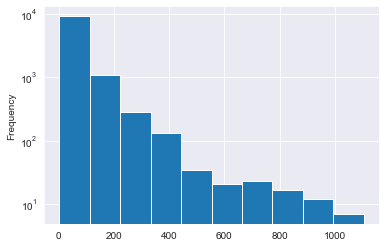

In [21]:
# Your code here - Check for outliers
df.list_price.plot(kind='hist').set_yscale('log')

In [22]:
# Your code here
# Remove extreme outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df2.list_price.quantile(q=q)))

# Rerun the model
orig_tot = len(df2)
df4 = df2[df2.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df4))/orig_tot)
df4.list_price = df4.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df4)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878
Percent removed: 0.010487580496780129


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     466.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:24:47   Log-Likelihood:                -4998.7
No. Observations:                8067   AIC:                         1.010e+04
Df Residuals:                    8014   BIC:                         1.047e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4229      0.014    252.429      0.000       3.396       3.449
piece_count                                          0.6393      0.010     65.224      0.000       0.620       0.658
num_reviews                                          0.0057      0.008      0.679      0.497      -0.011       0.022
play_star_rating                                     0.0951      0.006     15.659      0.000       0.083       0.107
val_star_rating                                     -0.1541      0.006    -25.490      0.000      -0.166      -0.142
ages_10_21                                           0.6717      0.040     16.664      0.000       0.593       0.751
ages_12_16                                          -0.2188      0.084     -2.593      0.010      -0.384      -0.053
ages_14plus                                          0.1972      0.050      3.939      0.000       0.099       0.295
ages_2_5                                             0.4648      0.022     20.920      0.000       0.421       0.508
ages_4plus                                          -1.3934      0.127    -10.984      0.000      -1.642      -1.145
ages_5_12                                           -0.6703      0.032    -21.001      0.000      -0.733      -0.608
ages_6plus                                          -0.9201      0.070    -13.190      0.000      -1.057      -0.783
ages_6_12                                           -0.1710      0.019     -9.042      0.000      -0.208      -0.134
ages_7_12                                            0.0494      0.024      2.026      0.043       0.002       0.097
ages_7_14                                            0.0041      0.021      0.197      0.844      -0.036       0.044
ages_8plus                                           0.5732      0.054     10.686      0.000       0.468       0.678
ages_8_12                                            0.1892      0.031      6.016      0.000       0.128       0.251
ages_8_14                                            0.2536      0.020     12.513      0.000       0.214       0.293
ages_9plus                                           0.2436      0.123      1.986      0.047       0.003       0.484
ages_9_12                                            0.3068      0.082      3.731      0.000       0.146       0.468
theme_name_BOOST                                     0.9443      0.139      6.791      0.000       0.672       1.217
theme_name_Blues_Helicopter_Pursuit                  0.7257      0.101      7.182      0.000       0.528       0.924
theme_name_Carnotaurus_Gyrosphere_Escape             1.0810      0.115      9.386      0.000       0.855       1.307
theme_name_City                          

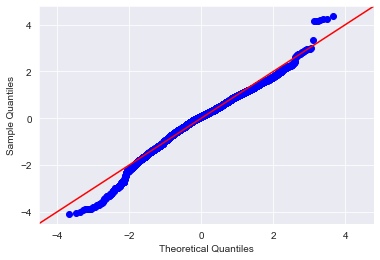

In [23]:
# Your code here - Check normality assumption
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

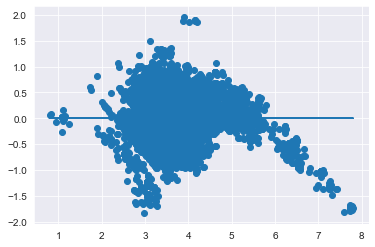

In [24]:
# Your code here - Check the Homoscedasticity Assumption
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


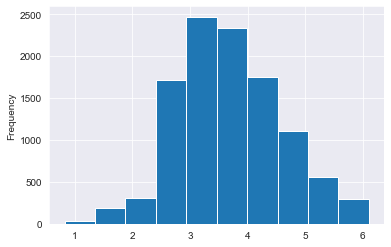

In [25]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df4.list_price.quantile(q=q)))

df4.list_price.plot(kind='hist')

In [26]:
df5 = df4[df4.list_price <= 6]
train, test = train_test_split(df5)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     459.7
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:25:04   Log-Likelihood:                -4883.1
No. Observations:                8027   AIC:                             9872.
Df Residuals:                    7974   BIC:                         1.024e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4490      0.014    254.133      0.000       3.422       3.476
piece_count                                          0.7064      0.011     66.744      0.000       0.686       0.727
num_reviews                                          0.0160      0.008      1.939      0.053      -0.000       0.032
play_star_rating                                     0.0961      0.006     16.027      0.000       0.084       0.108
val_star_rating                                     -0.1472      0.006    -24.399      0.000      -0.159      -0.135
ages_10_21                                           0.7443      0.040     18.498      0.000       0.665       0.823
ages_12_16                                          -0.3946      0.087     -4.545      0.000      -0.565      -0.224
ages_14plus                                          0.0514      0.052      0.989      0.323      -0.050       0.153
ages_2_5                                             0.4781      0.022     21.594      0.000       0.435       0.522
ages_4plus                                          -1.4221      0.119    -11.922      0.000      -1.656      -1.188
ages_5_12                                           -0.6713      0.031    -21.314      0.000      -0.733      -0.610
ages_6plus                                          -0.9324      0.073    -12.794      0.000      -1.075      -0.789
ages_6_12                                           -0.1691      0.019     -9.043      0.000      -0.206      -0.132
ages_7_12                                            0.0658      0.024      2.782      0.005       0.019       0.112
ages_7_14                                            0.0012      0.021      0.059      0.953      -0.039       0.041
ages_8plus                                           0.5706      0.056     10.272      0.000       0.462       0.679
ages_8_12                                            0.1625      0.031      5.283      0.000       0.102       0.223
ages_8_14                                            0.2495      0.020     12.497      0.000       0.210       0.289
ages_9plus                                           0.2796      0.127      2.202      0.028       0.031       0.529
ages_9_12                                            0.2802      0.074      3.808      0.000       0.136       0.424
theme_name_BOOST                                     0.9166      0.137      6.672      0.000       0.647       1.186
theme_name_Blues_Helicopter_Pursuit                  0.6943      0.117      5.918      0.000       0.464       0.924
theme_name_Carnotaurus_Gyrosphere_Escape             1.0407      0.114      9.144      0.000       0.818       1.264
theme_name_City                          

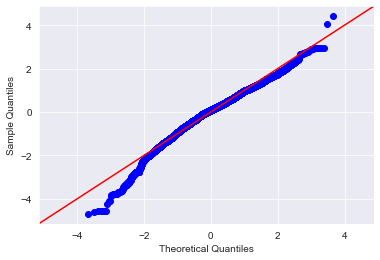

In [27]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

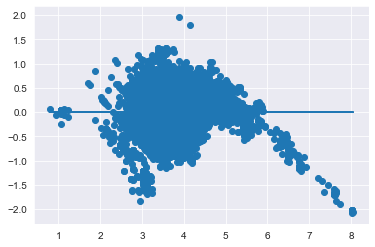

In [28]:
# Check the Homoscedasticity Assumption
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [29]:
# An Alternative Approach: Building a Model From the Ground Up
x_cols = ['piece_count', 'country_US']
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     4482.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:25:14   Log-Likelihood:                -7434.3
No. Observations:                8027   AIC:                         1.487e+04
Df Residuals:                    8024   BIC:                         1.490e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7365      0.007    528.399      0.000       3.723       3.750
piece_count     0.7917      0.008     93.993      0.000       0.775       0.808
country_US     -0.2646      0.028     -9.599      0.000      -0.319      -0.211
==============================================================================
Omnibus:                      533.547   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.152
Skew:                          -0.536   Prob(JB):                    2.22e-183
Kurtosis:                       4.169   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

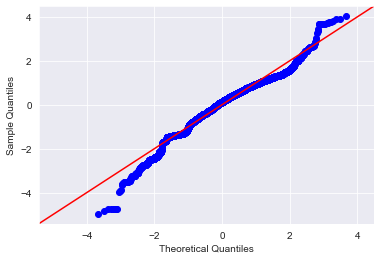

In [30]:
# Checking Assumptions for Simplified Model
# Check Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

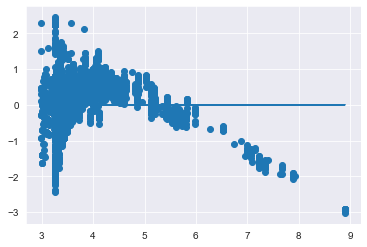

In [31]:
# Check Homoscedasticity Assumption
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 